### **pdfplumber**
In today’s digital age, many critical documents—ranging from financial reports to academic papers—are available only in PDF format. Extracting data from PDFs can be challenging due to their complex layouts and structures. **pdfplumber** is a powerful Python library that simplifies the process of scraping text, tables, and metadata from PDF files.  

While **pdfplumber** provides customizable methods for extracting text and tables, it does not include Optical Character Recognition (OCR) capabilities. Therefore, it cannot extract text from PDFs generated from image files.

Read the [documentation](https://github.com/jsvine/pdfplumber) for further details.

For our practice we will use https://github.com/jsvine/pdfplumber/blob/c562774331905a9770f03c0aaba13a69c7c6d683/examples/pdfs/ca-warn-report.pdf


In [3]:
"""
Objective: Read metadata from a document
"""
# %pip install pdfplumber

import pdfplumber

# TODO: Download the pdf file and replace it to the current folder

filename = "ca-warn-report.pdf"

pdf = pdfplumber.open(filename)
metadata = pdf.metadata
print("PDF Metadata:")
print(metadata)

# TODO: What information is available in the metadata?

PDF Metadata:
{'Author': 'Cuellar-Lopez, Monica', 'CreationDate': "D:20160325082400-07'00'", 'ModDate': "D:20160325082400-07'00'", 'Producer': 'Microsoft® Excel® 2013', 'Creator': 'Microsoft® Excel® 2013'}


In [ ]:
"""
Objective: Open PDF file and display the page as image
"""

first_page = pdf.pages[0] # get the first page
img = first_page.to_image(resolution=300) # convert the page file to image file
img.show() # this will show the image in your default image viewer
# this will help you to validate the page that you are getting instead of opening it manually

# TODO: You might realize that the image file have low resolution, improve the resolution by using resolution parameter
img = first_page.to_image(resolution=600) 
# TODO: Use pages method to count the number of pages
print("Number of pages in the document: ", len(pdf.pages))

Opening in existing browser session.


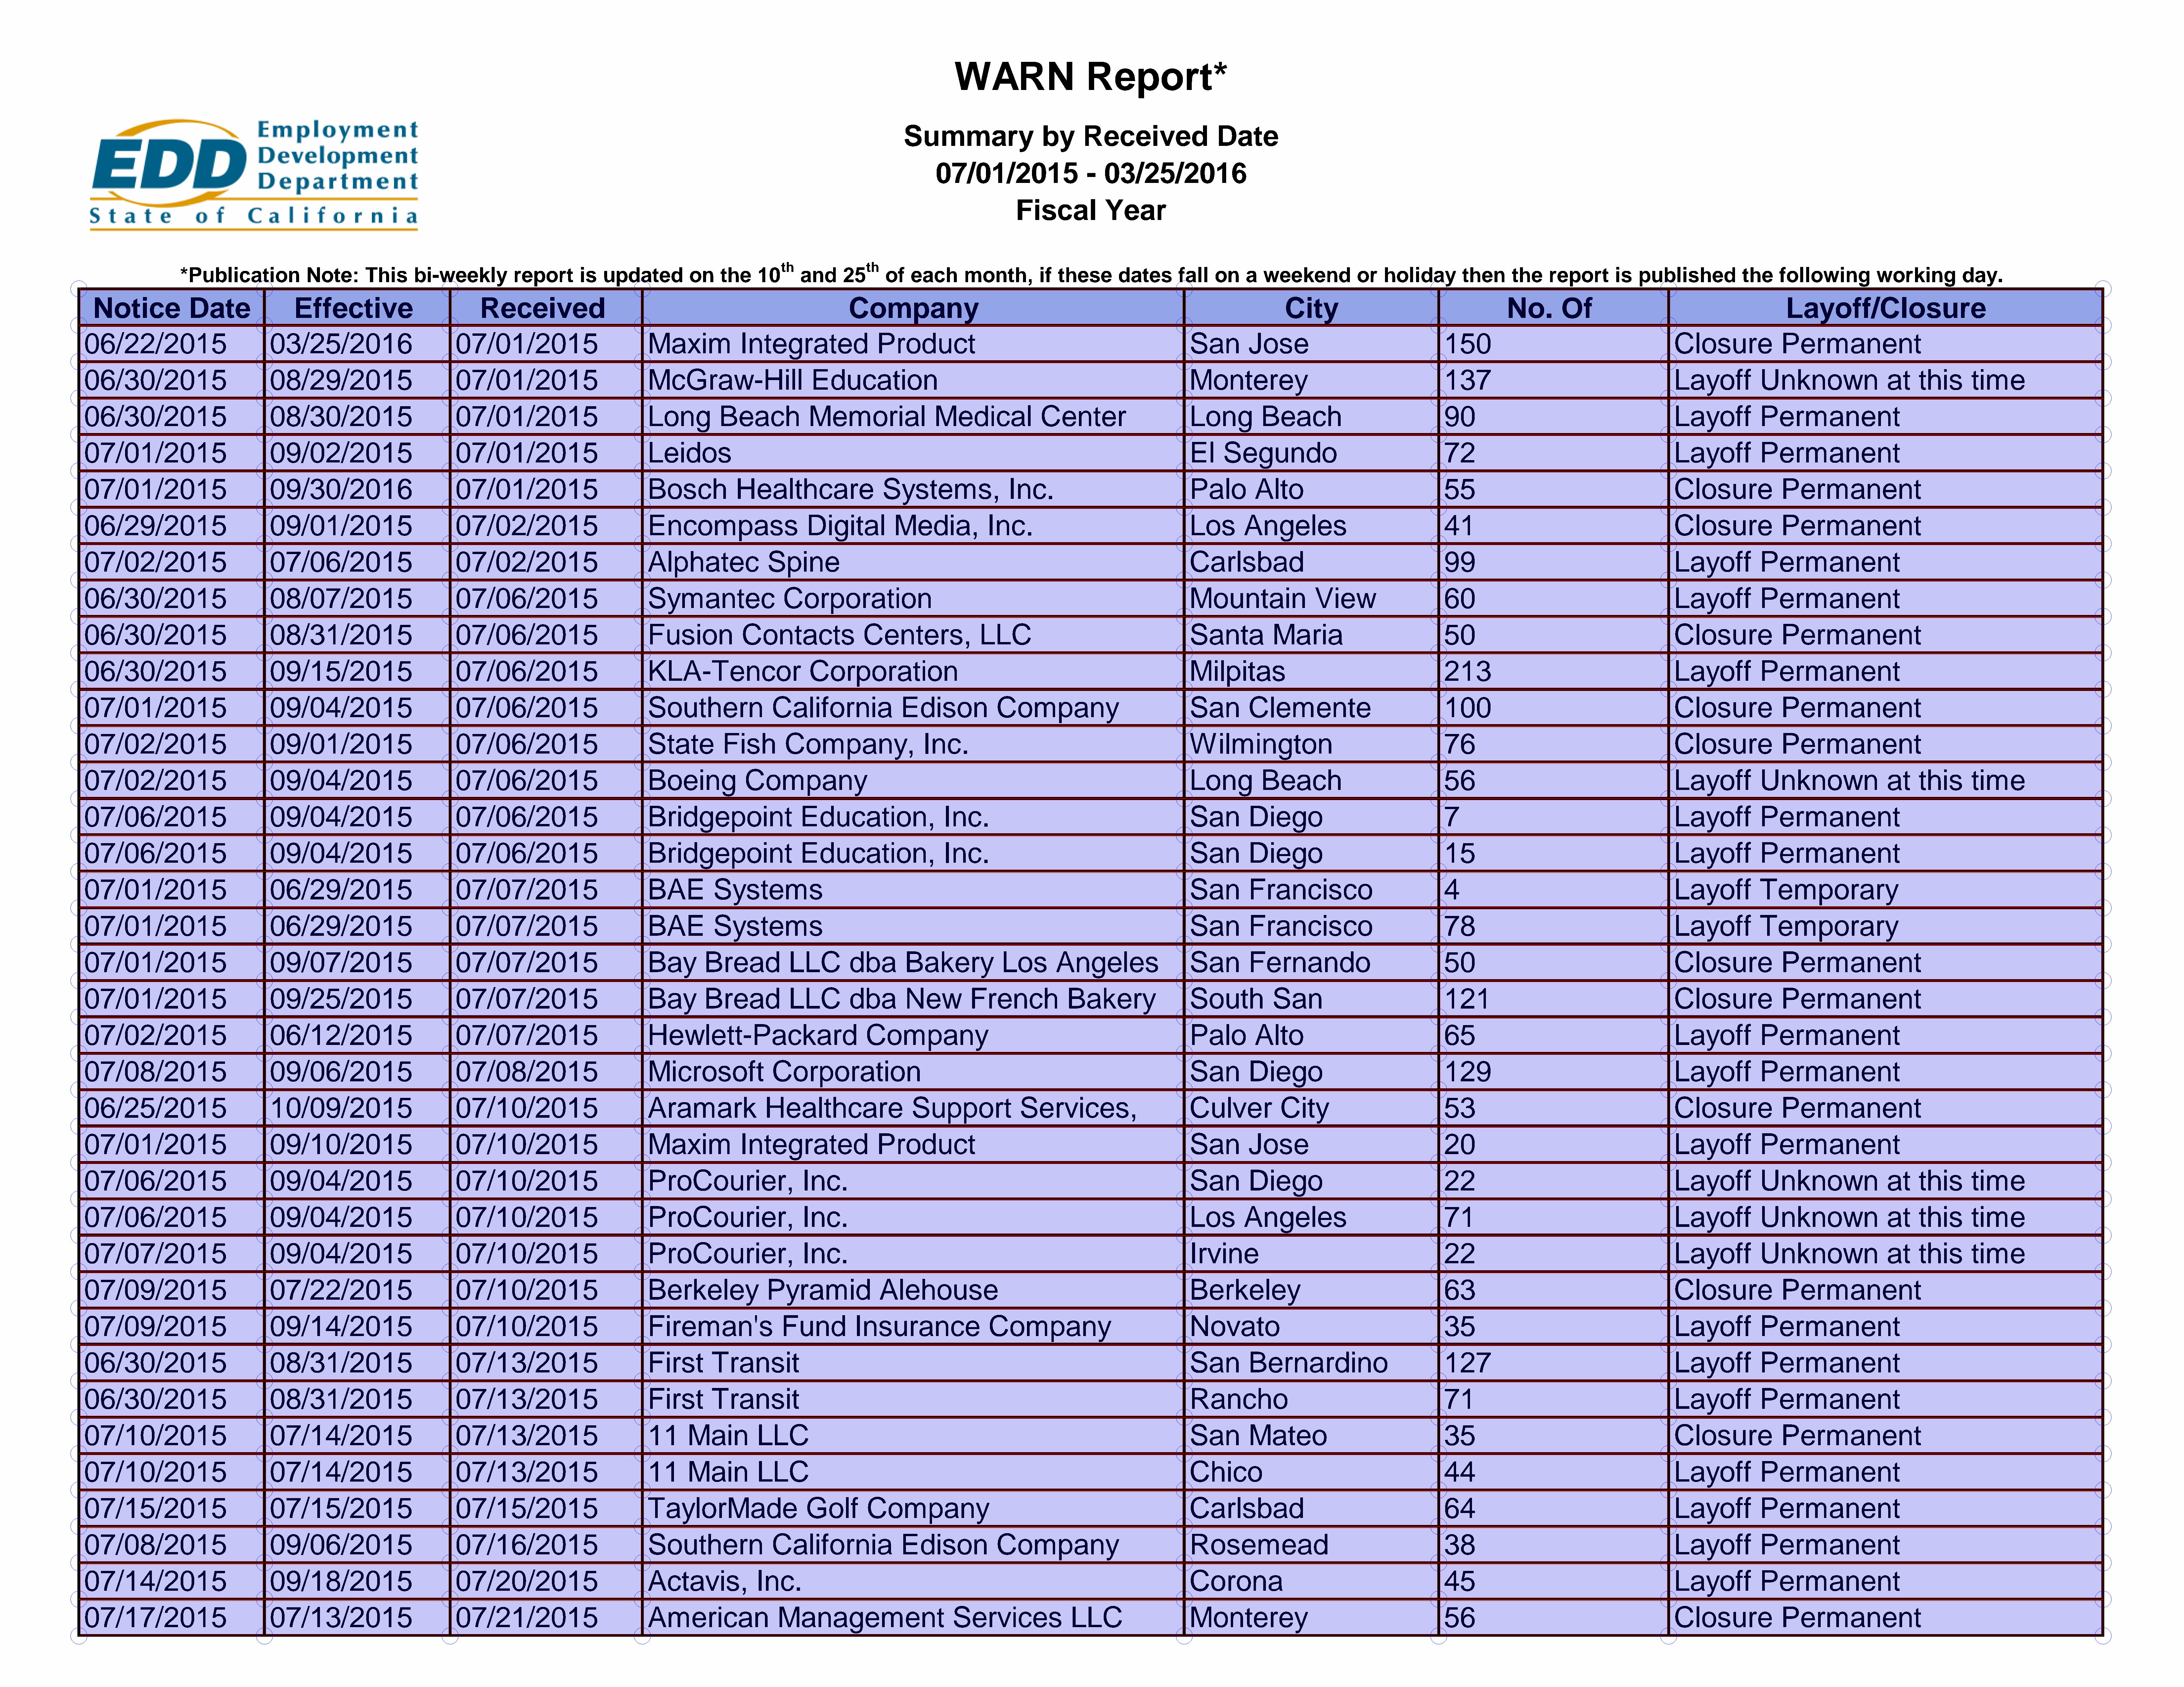

In [8]:
"""
Objective: Check if pdfplumber able to detect the table
"""

img.debug_tablefinder()
# TODO: What is the output? What is the difference from the origin page?

In [9]:
"""
Objective: Extract table for the first page
"""

tables = first_page.extract_table()
tables
# TODO: You might realize that the output is not clean. What is the issue?
# TODO: pdfplumber provides methods for `extract_tables()` and `extract_table()`. What is the difference, and when should each be used?

[['Notice Date',
  'Effective',
  'Received',
  'Company',
  'City',
  'No. Of',
  'Layoff/Closure'],
 ['06/22/2015',
  '0 3 / 2 5 / 2 0 16',
  '0 7 / 0 1 / 2 0 15',
  'Maxim Integrated Product',
  'San Jose',
  '150',
  'Closure Permanent'],
 ['06/30/2015',
  '0 8 / 2 9 / 2 0 15',
  '0 7 / 0 1 / 2 0 15',
  'McGraw-Hill Education',
  'Monterey',
  '137',
  'Layoff Unknown at this time'],
 ['06/30/2015',
  '0 8 / 3 0 / 2 0 15',
  '0 7 / 0 1 / 2 0 15',
  'Long Beach Memorial Medical Center',
  'Long Beach',
  '90',
  'Layoff Permanent'],
 ['07/01/2015',
  '0 9 / 0 2 / 2 0 15',
  '0 7 / 0 1 / 2 0 15',
  'Leidos',
  'El Segundo',
  '72',
  'Layoff Permanent'],
 ['07/01/2015',
  '0 9 / 3 0 / 2 0 16',
  '0 7 / 0 1 / 2 0 15',
  'Bosch Healthcare Systems, Inc.',
  'Palo Alto',
  '55',
  'Closure Permanent'],
 ['06/29/2015',
  '0 9 / 0 1 / 2 0 15',
  '0 7 / 0 2 / 2 0 15',
  'Encompass Digital Media, Inc.',
  'Los Angeles',
  '41',
  'Closure Permanent'],
 ['07/02/2015',
  '0 7 / 0 6 / 2 0 15',


In [ ]:
"""
Objective: Data Cleansing
"""

# TODO: Analyze the previous output structure, decide which is column (header) and which is row (data)

import pandas as pd

header = tables[0] # TODO: Replace the value with the index slicing from the previous output
data = tables[1:] # TODO: Replace the value with the index slicing from the previous output

df = pd.DataFrame(data, columns=header)
for column in ["Effective", "Received"]:
    df[column] = df[column].str.replace(" ", "") # remove the space

,Notice Date,Effective,Received,Company,City,No. Of,Layoff/Closure
0,06/22/2015,03/25/2016,07/01/2015,Maxim Integrated Product,San Jose,150,Closure Permanent
1,06/30/2015,08/29/2015,07/01/2015,McGraw-Hill Education,Monterey,137,Layoff Unknown at this time
2,06/30/2015,08/30/2015,07/01/2015,Long Beach Memorial Medical Center,Long Beach,90,Layoff Permanent
3,07/01/2015,09/02/2015,07/01/2015,Leidos,El Segundo,72,Layoff Permanent
4,07/01/2015,09/30/2016,07/01/2015,"Bosch Healthcare Systems, Inc.",Palo Alto,55,Closure Permanent
5,06/29/2015,09/01/2015,07/02/2015,"Encompass Digital Media, Inc.",Los Angeles,41,Closure Permanent
6,07/02/2015,07/06/2015,07/02/2015,Alphatec Spine,Carlsbad,99,Layoff Permanent
7,06/30/2015,08/07/2015,07/06/2015,Symantec Corporation,Mountain View,60,Layoff Permanent
8,06/30/2015,08/31/2015,07/06/2015,"Fusion Contacts Centers, LLC",Santa Maria,50,Closure Permanent
9,06/30/2015,09/15/2015,07/06/2015,KLA-Tencor Corporation,Milpitas,213,Layoff Permanent


In [ ]:
"""
Objective: Extract all the tables
"""

# result = []

# for i in range(3, 7): # sample page range
#     table = pdf.pages[i].extract_table() # extract the table
#     df = pd.DataFrame(data) # convert to dataframe
#     result.append(df) # append to the list

# df = pd.concat(result) # concat all the dataframe
# df
    
# TODO: Improve the code to extract all the tables from all the pages
# TODO: Make sure the header and the footer is included
# TODO: Clean the data

import pdfplumber
import pandas as pd

filename = "ca-warn-report.pdf"

pdf = pdfplumber.open(filename)
table1 = []
table2 = []

# Proses halaman PDF
for i, page in enumerate(pdf.pages):
    # Tangkap semua tabel dari halaman
    tables = page.extract_tables()
    
    if i == 0:
        # Ambil tabel pertama di halaman pertama
        table = tables[0]
        header = table[0]
        data = table[1:]
        df = pd.DataFrame(data, columns=header)
        table1.append(df)
        
    elif i == len(pdf.pages) - 2:
        # Halaman kedua terakhir, bisa jadi ada dua tabel
        if len(tables) >= 1:
            table = tables[0]
            df = pd.DataFrame(data=table)
            table1.append(df)
        if len(tables) >= 2:
            table = tables[1]
            df = pd.DataFrame(data=table)
            table2.append(df)

    elif i == len(pdf.pages) - 1:
        # Halaman terakhir (lanjutan table2)
        table = page.extract_table()
        df = pd.DataFrame(data=table)
        table2.append(df)

    else:
        # Halaman biasa (lanjutan table1)
        table = page.extract_table()
        df = pd.DataFrame(data=table)
        table1.append(df)

# Gunakan header dari table1[0] untuk semua tabel setelahnya
header1 = table1[0].columns
for i in range(1, len(table1)):
    table1[i].columns = header1

# Sama untuk table2 (jika ada isi)
if table2:
    header2 = table2[0].iloc[0]  # Ambil header dari baris pertama
    table2[0] = table2[0].iloc[1:]  # Buang baris header
    table2[0].columns = header2
    for i in range(1, len(table2)):
        table2[i].columns = header2

# Gabungkan semua DataFrame
df1 = pd.concat(table1, ignore_index=True)
df2 = pd.concat(table2, ignore_index=True) if table2 else pd.DataFrame()

# buang spasi yang tidak perlu
for column in ["Effective", "Received"]:
    df1[column] = df1[column].str.replace(" ", "") 

df1.to_csv("table1.csv", index=False)
df2.to_csv("table2.csv", index=False)


CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox


In [ ]:
"""
Objective: Extract words
"""
import pdfplumber

# TODO: Download the pdf file and replace it to the current folder

filename = "ca-warn-report.pdf"

pdf = pdfplumber.open(filename)
first_page = pdf.pages[0] # get the first page
# first_page.extract_words()
first_page.extract_text().replace("\n", " ")


# TODO: pdfplumber have methods for `extract_words()`, `extract_text()`. What is the difference, and when should each be used?
"""
extract_words() used to extract words from the page,
while extract_text() used to extract the text from the page.
extract_words() will return a list of dictionaries,
while extract_text() will return a string.
extract_words() is useful when you need to extract the words with their position,
while extract_text() is useful when you need to extract the text without the position.
"""

CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox


"WARN Report* Summary by Received Date 07/01/2015 - 03/25/2016 Fiscal Year *Publication Note: This bi-weekly report is updated on the 10th and 25th of each month, if these dates fall on a weekend or holiday then the report is published the following working day. Notice Date Effective Received Company City No. Of Layoff/Closure 06/22/2015 0 3 / 2 5 / 2 0 16 0 7 / 0 1 / 2 0 15 Maxim Integrated Product San Jose 150 Closure Permanent 06/30/2015 0 8 / 2 9 / 2 0 15 0 7 / 0 1 / 2 0 15 McGraw-Hill Education Monterey 137 Layoff Unknown at this time 06/30/2015 0 8 / 3 0 / 2 0 15 0 7 / 0 1 / 2 0 15 Long Beach Memorial Medical Center Long Beach 90 Layoff Permanent 07/01/2015 0 9 / 0 2 / 2 0 15 0 7 / 0 1 / 2 0 15 Leidos El Segundo 72 Layoff Permanent 07/01/2015 0 9 / 3 0 / 2 0 16 0 7 / 0 1 / 2 0 15 Bosch Healthcare Systems, Inc. Palo Alto 55 Closure Permanent 06/29/2015 0 9 / 0 1 / 2 0 15 0 7 / 0 2 / 2 0 15 Encompass Digital Media, Inc. Los Angeles 41 Closure Permanent 07/02/2015 0 7 / 0 6 / 2 0 15

CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, def

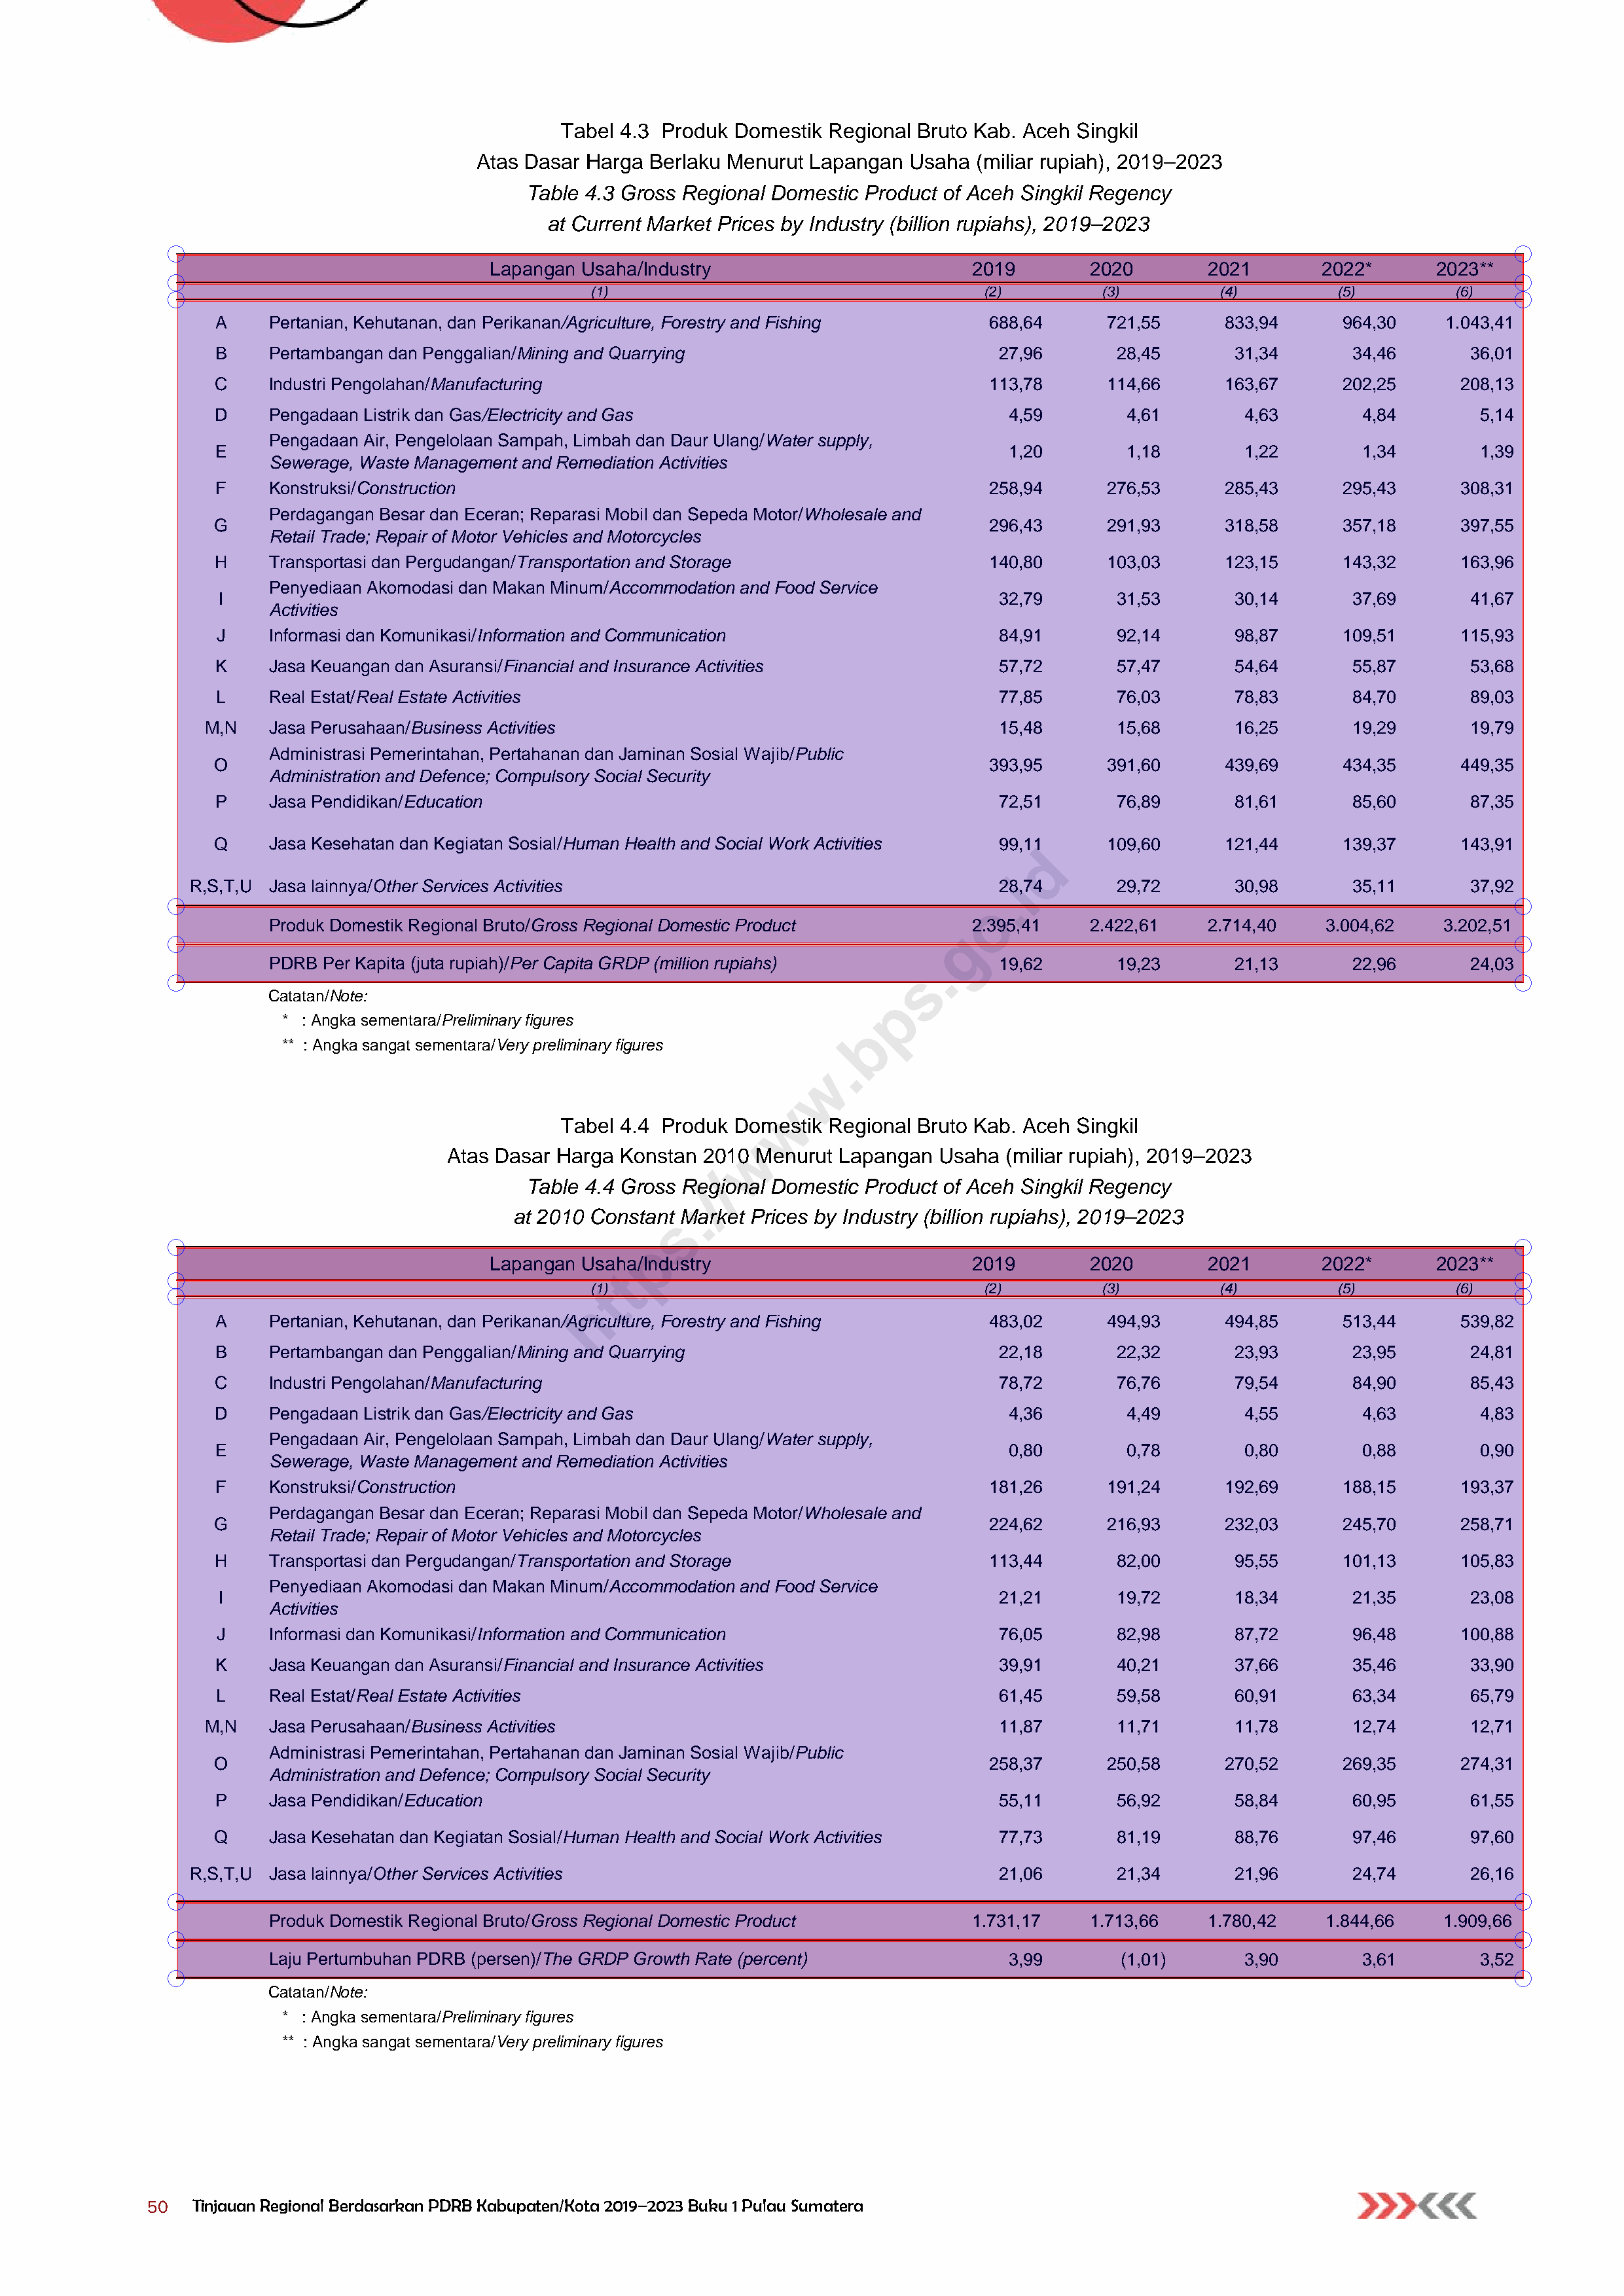

In [23]:
"""
Objective: Handling undetectable table
"""
import pdfplumber

# TODO: Download this pdf file and replace it to the current folder 
download_this = "https://www.bps.go.id/id/publication/2024/09/13/c96f4e54ed31739e138ea6f1/tinjauan-regional-berdasarkan-pdrb-kabupaten-kota-2019-2023-buku-1-pulau-sumatera.html"

# TODO: Open page 75 and find the table using debug_tablefinder
# TODO: 

pdf2 = pdfplumber.open("tinjauan-regional-berdasarkan-pdrb-kabupaten-kota-2019-2023--buku-1-pulau-sumatera.pdf")
page = pdf2.pages[75]
page = page.to_image(resolution=300)

page.debug_tablefinder()

# TODO: Notice that the output shows the table is found, but the rows are not properly highlighted.

In [53]:
"""
Objective: Handling undetectable table
"""
page = pdf2.pages[75]
# bbox = (69, 95, page.width, 360)
# cropped = page.within_bbox(bbox) 
# cropped = page.to_image(resolution=300)
page.debug_tablefinder()
for char in page.extract_words():
    print(f"Text: {char['text']}, Coordinates: (x0={char['x0']}, y0={char['top']}, x1={char['x1']}, y1={char['bottom']})")

# TODO: Using extract_words() method to locate the coordinate in table

Text: Tabel, Coordinates: (x0=205.679199, y0=45.537218999999936, x1=225.1069514484096, y1=53.217219)
Text: 4.3, Coordinates: (x0=227.23234142795522, y0=45.537218999999936, x1=237.9590388698496, y1=53.217219)
Text: Produk, Coordinates: (x0=242.3018934850944, y0=45.537218999999936, x1=266.7477146938752, y1=53.217219)
Text: Domestik, Coordinates: (x0=269.018889545664, y0=45.537218999999936, x1=301.2680378634624, y1=53.217219)
Text: Regional, Coordinates: (x0=303.5392127152512, y0=45.537218999999936, x1=334.00825101408003, y1=53.217219)
Text: Bruto, Coordinates: (x0=336.1336409936256, y0=45.537218999999936, x1=354.53322644832, y1=53.217219)
Text: Kab., Coordinates: (x0=356.7276724199808, y0=45.537218999999936, x1=372.62589638250245, y1=53.217219)
Text: Aceh, Coordinates: (x0=374.7973236901248, y0=45.537218999999936, x1=392.36056435142405, y1=53.217219)
Text: Singkil, Coordinates: (x0=394.55501032308484, y0=45.537218999999936, x1=417.35116060911355, y1=53.217219)
Text: Atas, Coordinates: (x

In [ ]:
"""
Objective: Extracting with explicit coordinates
"""
import pdfplumber
import pandas as pd

pdf2 = pdfplumber.open("tinjauan-regional-berdasarkan-pdrb-kabupaten-kota-2019-2023--buku-1-pulau-sumatera.pdf")

page = pdf2.pages[75]
bbox = (69, 95, page.width, 360)
cropped = page.within_bbox(bbox) 

xCoordinates = [69, 98, 356, 399, 442, 484, 526, 555] 

table = cropped.extract_table(table_settings={
    "vertical_strategy": "explicit",
    "explicit_vertical_lines": xCoordinates,
    "horizontal_strategy": "text",
})

bbox = (69, 458, page.width, 736)
cropped = page.within_bbox(bbox) 
table2 = cropped.extract_table(table_settings={
    "vertical_strategy": "explicit",
    "explicit_vertical_lines": xCoordinates,
    "horizontal_strategy": "text",
})
table2 = table2[1:]  # buang header

all_table = table + table2

def clean_table(table):
    # Clean the table data
    cleaned_table = []
    for row in table:
        cleaned_row = [cell.strip() for cell in row if cell.strip()]
        if cleaned_row:
            cleaned_table.append(cleaned_row)
    return cleaned_table

def concat_two_line_cells(table):
    result = []
    for row in table:
        if len(row) == 1 and result:
            result[-1][1] += ' ' + row[0].strip()
        else:
            result.append(row)
    return result

cleaned_table = concat_two_line_cells(clean_table(all_table))

cleaned_table[0] = [" "] + cleaned_table[0]
cleaned_table[1] = [" "] + cleaned_table[1] 

df = pd.DataFrame(cleaned_table[1:], columns=cleaned_table[0])
df.to_csv("table3.csv", index=False)

# TODO: Clean this data to be more readable
# TODO: Each page have 2 table, all table should be able to be merge in single table, how to do it? explain in the comment section below

CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox


CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, def

In [84]:
"""
Objective: Extracting non-table document (Opsional)
"""

# TODO: Download this pdf file and replace it to the current folder
download_this = "https://www.bps.go.id/id/publication/2023/09/29/8c2d8435fe0c552c6ffdc528/direktori-industri-manufaktur-indonesia-2023.html"

# TODO: Extract information you can get from this document
import pdfplumber

pdf3 = pdfplumber.open("direktori-industri-manufaktur-indonesia-2023.pdf")
page = pdf3.metadata
print(page)

{'Producer': 'FPDF 1.81', 'CreationDate': 'D:20230922144613'}


### **Reflection**
What challenges that might araise when extracting text from different documents?

most related problems are related to inconsistent layouts, broken words or sentences and file encoding

### **Exploration**
For further learning, explore the integration of Optical Character Recognition (OCR) to extract text from scanned PDFs or those with image-based content. Consider using the **pytesseract** module alongside libraries like **Pillow** for image processing.